<a href="https://colab.research.google.com/github/phanloc1622/BTVNAI_PHANXUANLOC_18146171/blob/main/CNN_PHANLOAIMONAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install bing-image-downloader

In [25]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Banh_xeo')
downloader.download("bánh hỏi",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Banh_hoi')
downloader.download("bánh ướt",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Banh_uot')
downloader.download("bánh da lợn",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Banh_da_lon')
downloader.download("bánh mì",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Banh_mi')
downloader.download("bánh bò",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Banh_bo')
downloader.download("phở bò",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Pho_bo')
downloader.download("mì ý",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/mi_y')
downloader.download("bún thịt nướng",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Bun_thit_nuong')
downloader.download("bò kho",limit=20,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Train/bo_kho')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/Monanvn/Train/Banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/7a/d3/d2/7ad3d232b7852f49a83f230ac3406d44.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://asianinspirations.com.au/wp-content/uploads/2019/06/R00499_Banh-Xeo-Nuoc-Cham-Sauce-3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://delightfulplate.com/wp-content/uploads/2020/09/Vietnamese-Crepe-Banh-Xeo-feat

In [26]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_xeo')
downloader.download("bánh hỏi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_hoi')
downloader.download("bánh ướt",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_uot')
downloader.download("bánh da lợn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_da_lon')
downloader.download("bánh mì",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_mi')
downloader.download("bánh bò",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_bo')
downloader.download("phở bò",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Pho_bo')
downloader.download("mì ý",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/mi_y')
downloader.download("bún thịt nướng",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Bun_thit_nuong')
downloader.download("bò kho",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/bo_kho')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/7a/d3/d2/7ad3d232b7852f49a83f230ac3406d44.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://asianinspirations.com.au/wp-content/uploads/2019/06/R00499_Banh-Xeo-Nuoc-Cham-Sauce-3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://delightfulplate.com/wp-content/uploads/2020/09/Vietnamese-Crepe-Banh-Xeo-featu

In [27]:
from bing_image_downloader import downloader
downloader.download("bánh xèo",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Banh_xeo')
downloader.download("bánh hỏi",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Banh_hoi')
downloader.download("bánh ướt",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Banh_uot')
downloader.download("bánh da lợn",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Banh_da_lon')
downloader.download("bánh mì",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Banh_mi')
downloader.download("bánh bò",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Banh_bo')
downloader.download("phở bò",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Pho_bo')
downloader.download("mì ý",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/mi_y')
downloader.download("bún thịt nướng",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Bun_thit_nuong')
downloader.download("bò kho",limit=10,output_dir='/content/drive/MyDrive/Colab Notebooks/Monanvn/validation/bo_kho')

[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/Monanvn/validation/Banh_xeo/bánh xèo


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.lasinfoniadelreyhotel.com/img/upload/Vietnamese_Crepes_Banh_Xeo_2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/7a/d3/d2/7ad3d232b7852f49a83f230ac3406d44.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://yesyourtrip.com/wp-content/uploads/2017/04/Banh-xeo-Vietnamese-pancake-3.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.luxurycruisemekong.com/wp-content/uploads/2017/04/Banh-Xeo-the-famous-kind-of-Vietnamese-traditional-food.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://asianinspirations.com.au/wp-content/uploads/2019/06/R00499_Banh-Xeo-Nuoc-Cham-Sauce-3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://delightfulplate.com/wp-content/uploads/2020/09/Vietnamese-Crepe-Banh-Xeo

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Monanvn/Train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Monanvn/validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 214 images belonging to 10 classes.
Found 102 images belonging to 10 classes.


In [29]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [30]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Monanvn/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 214 images belonging to 10 classes.


In [31]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Monanvn/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 102 images belonging to 10 classes.


In [32]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43808)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [33]:
training_data.class_indices

{'Banh_bo': 0,
 'Banh_da_lon': 1,
 'Banh_hoi': 2,
 'Banh_mi': 3,
 'Banh_uot': 4,
 'Banh_xeo': 5,
 'Bun_thit_nuong': 6,
 'Pho_bo': 7,
 'bo_kho': 8,
 'mi_y': 9}

In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [35]:
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=50,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
7/7 [==============================] - 37s 5s/step - loss: 7.2881 - accuracy: 0.0935 - val_loss: 2.2957 - val_accuracy: 0.1176
Epoch 2/50
7/7 [==============================] - 34s 5s/step - loss: 2.2880 - accuracy: 0.1121 - val_loss: 2.2667 - val_accuracy: 0.2059
Epoch 3/50
7/7 [==============================] - 34s 5s/step - loss: 2.2723 - accuracy: 0.1402 - val_loss: 2.1645 - val_accuracy: 0.2647
Epoch 4/50
7/7 [==============================] - 33s 5s/step - loss: 2.2201 - accuracy: 0.1402 - val_loss: 2.1455 - val_accuracy: 0.1569
Epoch 5/50
7/7 [==============================] - 33s 5s/step - loss: 2.1044 - accuracy: 0.2336 - val_loss: 2.0153 - val_accuracy: 0.2745
Epoch 6/50
7/7 [==============================] - 34s 5s/step - loss: 1.9770 - accuracy: 0.2944 - val_loss: 1.8553 - val_accuracy: 0.3431
Epoch 7/50
7/7 [==============================] - 34s 5s/step - loss: 1.8316 - accuracy: 0.3832 - val_loss: 1.6827 - val_accuracy: 0.3824
Epoch 8/50
7/7 [==================

Sai số kiểm tra là:  0.21646390855312347
Độ chính xác kiểm tra là:  0.9607843160629272


<function matplotlib.pyplot.show>

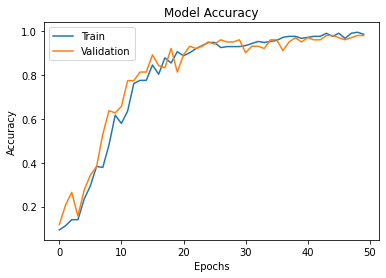

In [36]:
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [37]:
model.save("/content/drive/MyDrive/Colab Notebooks/Monanvn/monanvn.h5")

In [38]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/Monanvn/monanvn.h5')

bánh bò


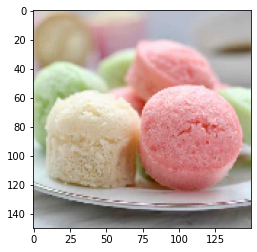

In [40]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_bo/bánh bò/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

bánh da lợn


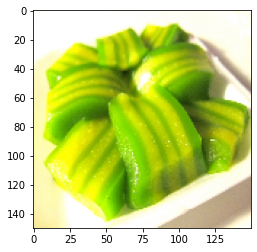

In [41]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_da_lon/bánh da lợn/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

bánh hỏi


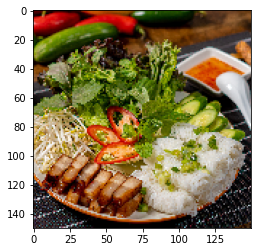

In [42]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_hoi/bánh hỏi/Image_3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

bánh mì


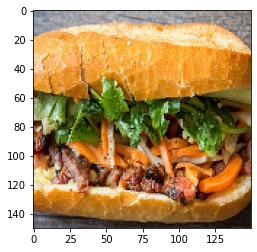

In [43]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_mi/bánh mì/Image_2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

bánh ướt


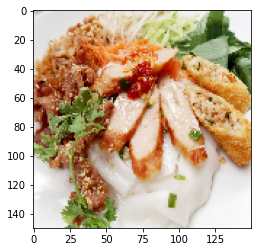

In [44]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_uot/bánh ướt/Image_1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

bánh xèo


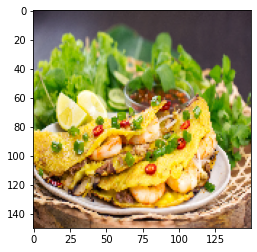

In [45]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Banh_xeo/bánh xèo/Image_5.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

bún thịt nướng


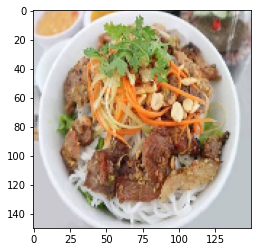

In [47]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Bun_thit_nuong/bún thịt nướng/Image_5.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

phở bò


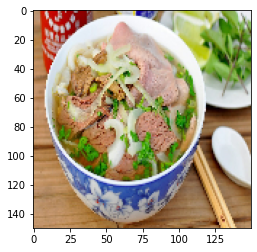

In [49]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/Pho_bo/phở bò/Image_5.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

bò kho


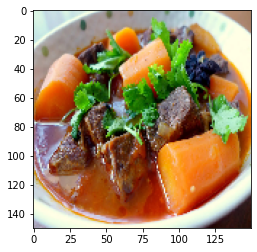

In [52]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/bo_kho/bò kho/Image_3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)

mì ý


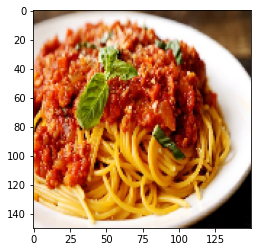

In [56]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Monanvn/Test/mi_y/mì ý/Image_6.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='bánh bò'
if round(result[0][1])==1:
  prediction='bánh da lợn'
if round(result[0][2])==1:
  prediction='bánh hỏi'
if round(result[0][3])==1:
  prediction='bánh mì'
if round(result[0][4])==1:
  prediction='bánh ướt'
if round(result[0][5])==1:
  prediction='bánh xèo'
if round(result[0][6])==1:
  prediction='bún thịt nướng'
if round(result[0][7])==1:
  prediction='phở bò'
if round(result[0][8])==1:
  prediction='bò kho'
if round(result[0][9])==1:
  prediction='mì ý'
print(prediction)